# Finite Differences

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

### Part 1: Examining the Differentiation Matrix

In [2]:
degree = 2
h = 0.25

# Assume even degree so that there's a well-defined middle node.
assert degree % 2 == 0

nodes = np.linspace(-h/2, h/2, degree+1)
nodes

array([-0.125,  0.   ,  0.125])

Now construct `V` (the generalized Vandermonde) and `Vprime` (the generalized Vandermonde for the derivatives):

In [3]:
V = np.array([
    nodes**i
    for i in range(degree+1)
]).T

In [4]:
def monomial_deriv(i, x):
    if i == 0:
        return 0*x
    else:
        return i*nodes**(i-1)

Vprime = np.array([
    monomial_deriv(i, nodes)
    for i in range(degree+1)
]).T

Combine them to form the derivative matrix:

In [6]:
#clear
diff_mat = Vprime.dot(la.inv(V))
diff_mat

array([[-12.,  16.,  -4.],
       [ -4.,   0.,   4.],
       [  4., -16.,  12.]])

Let's say we only care about the derivative at the middle node:

In [33]:
#clear
finite_difference_weights = diff_mat[degree//2]
finite_difference_weights

array([-4.,  0.,  4.])

* What have we learned?
* What formula does this amount to?
* How do these weights change if we change $h$?
* What formula does this amount to, really?
* What happens if we change the degree?
* What happens if we shift all nodes?

In [10]:
#clear
# * We could have left the middle point out. :)
# * -4*f(x-0.25) + 4*f(x+0.25)
# * They scale with 1/h, as you might expect.
# * (f(x-h/2) + f(x+h/2))/h
# * We get a more complicated (but more accurate) formula (with more source nodes)
# * The weights remain the same.

### Part 2: Using finite difference formulas

In [55]:
def f(x):
    return np.sin(4*x)
def df(x):
    return 4*np.cos(4*x)

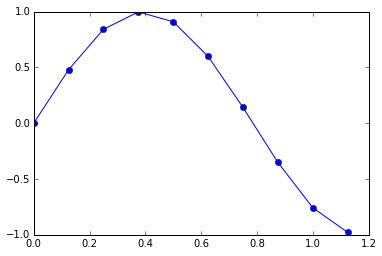

In [56]:
x = np.arange(10) * 0.125
pt.plot(x, f(x), "o-")

Now use the weights to compute the finite difference derivative as `deriv`:

In [57]:
#clear
fdw = finite_difference_weights

fx = f(x)
deriv = np.zeros(len(x)-2)
for i in range(1, 1+len(deriv)):
    deriv[i-1] = fx[i-1]*fdw[0] + fx[i]*fdw[1] + fx[i+1]*fdw[2]

Now plot the finite difference derivative:

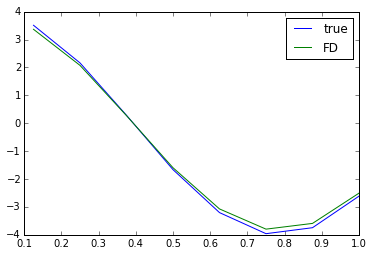

In [59]:
#clear
pt.plot(x[1:-1], df(x[1:-1]), label="true")
pt.plot(x[1:-1], deriv, label="FD")
pt.legend()